<Figure size 1200x600 with 0 Axes>

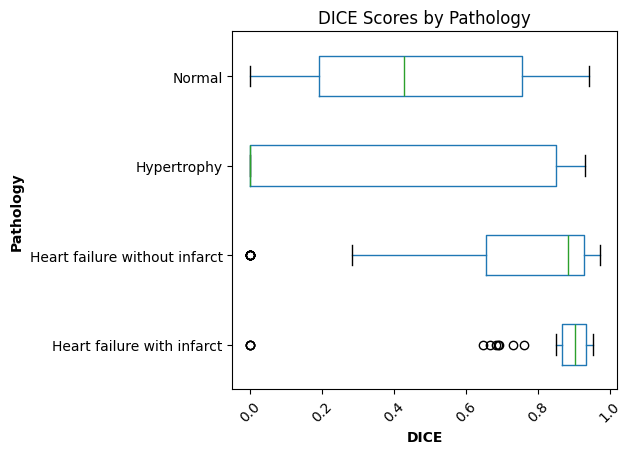

<Figure size 1200x600 with 0 Axes>

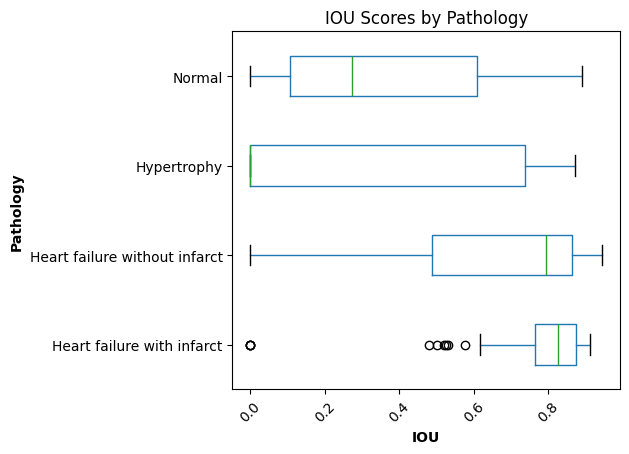

<Figure size 1200x600 with 0 Axes>

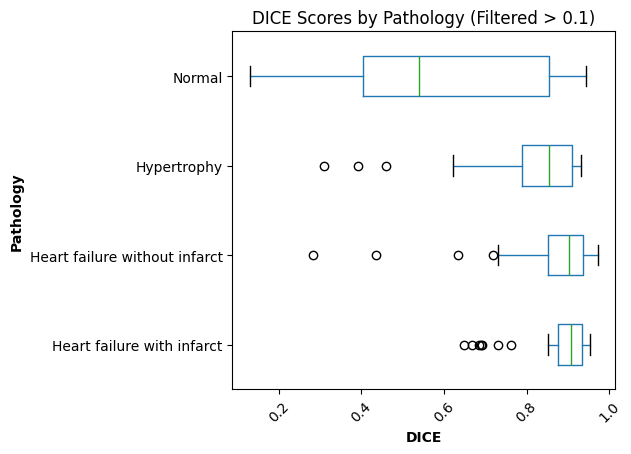

<Figure size 1200x600 with 0 Axes>

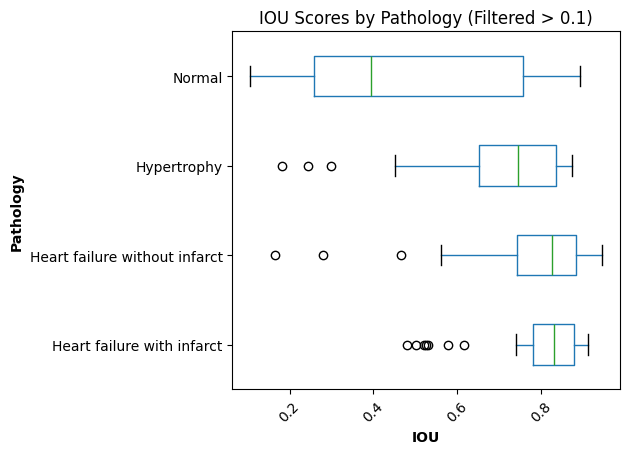

Analysis complete. Processed data saved to: C:\Users\Kaiwen Liu\OneDrive - University of Toronto\Desktop\github_repo\heart_cardiac_mri_image_processing\Marching_Cubes\processed_dice_iou_analysis.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# File paths
results_path = r"C:\Users\Kaiwen Liu\OneDrive - University of Toronto\Desktop\github_repo\heart_cardiac_mri_image_processing\Marching_Cubes\marching_cubes_results.xlsx"
patient_data_path = r"C:\Users\Kaiwen Liu\OneDrive - University of Toronto\Desktop\github_repo\heart_cardiac_mri_image_processing\scd_patientdata_xlsx.xlsx"

# Read the results file
results_df = pd.read_excel(results_path)

# Read the patient data
patient_df = pd.read_excel(patient_data_path, sheet_name="patient_data")

# Filter out rows where Dice and IOU are NaN
results_df = results_df.dropna(subset=["dice", "iou"])

# Merge results with patient data on patient_id
merged_df = results_df.merge(patient_df[["patient_id", "pathology"]], on="patient_id", how="left")

# Directory to save graphs
output_dir = os.path.dirname(results_path)

def plot_metric_by_pathology(df, metric, min_threshold=None, filename=None):
    """
    Plots a boxplot of the given metric (Dice or IOU) by pathology.
    Optionally filters out values below a given threshold.
    """
    if min_threshold is not None:
        df = df[df[metric] >= min_threshold]
    
    plt.figure(figsize=(12, 6))
    df.boxplot(column=metric, by="pathology", vert=False, grid=False)
    plt.title(f"{metric.upper()} Scores by Pathology" + (f" (Filtered > {min_threshold})" if min_threshold else ""))
    plt.suptitle("")  # Remove default title
    plt.xlabel(metric.upper(), fontweight='bold')
    plt.ylabel("Pathology", fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    if filename:
        plt.savefig(os.path.join(output_dir, filename))
    
    plt.show()

# Plot Dice and IOU for all data
plot_metric_by_pathology(merged_df, "dice", filename="dice_scores_all.png")
plot_metric_by_pathology(merged_df, "iou", filename="iou_scores_all.png")

# Plot Dice and IOU with exclusion of scores below 0.1
plot_metric_by_pathology(merged_df, "dice", min_threshold=0.1, filename="dice_scores_filtered.png")
plot_metric_by_pathology(merged_df, "iou", min_threshold=0.1, filename="iou_scores_filtered.png")

# Save processed data to an Excel file
output_excel_path = os.path.join(output_dir, "processed_dice_iou_analysis.xlsx")
merged_df.to_excel(output_excel_path, index=False)

print(f"Analysis complete. Processed data saved to: {output_excel_path}")


In [4]:
# Define output file path in the same directory as input Excel
output_dir = os.path.dirname(results_path)
output_file = os.path.join(output_dir, "dice_iou_summary.xlsx")

# Function to calculate mean and std with formatting
def mean_std_format(series):
    return f"{series.mean():.3f} ({series.std():.3f})" if not series.empty else "N/A"

# Group by pathology and compute mean (SD) for both Dice and IOU
summary_data = []
for pathology, group in merged_df.groupby("pathology"):
    dice_all = mean_std_format(group["dice"])
    iou_all = mean_std_format(group["iou"])
    
    # Filter Dice/IOU > 0.1
    filtered_group = group[(group["dice"] > 0.1) & (group["iou"] > 0.1)]
    dice_filtered = mean_std_format(filtered_group["dice"])
    iou_filtered = mean_std_format(filtered_group["iou"])
    
    summary_data.append([pathology, dice_all, iou_all, dice_filtered, iou_filtered])

# Create DataFrame
summary_df = pd.DataFrame(
    summary_data, 
    columns=["Pathology", "Dice (All)", "IOU (All)", "Dice (Filtered)", "IOU (Filtered)"]
)

# Save to Excel
summary_df.to_excel(output_file, index=False)
print(f"Summary table saved to {output_file}")

# Display the table
print(summary_df)

Summary table saved to C:\Users\Kaiwen Liu\OneDrive - University of Toronto\Desktop\github_repo\heart_cardiac_mri_image_processing\Marching_Cubes\dice_iou_summary.xlsx
                       Pathology     Dice (All)      IOU (All)  \
0     Heart failure with infarct  0.825 (0.235)  0.746 (0.228)   
1  Heart failure without infarct  0.683 (0.369)  0.613 (0.345)   
2                    Hypertrophy  0.383 (0.416)  0.329 (0.370)   
3                         Normal  0.455 (0.328)  0.356 (0.303)   

  Dice (Filtered) IOU (Filtered)  
0   0.884 (0.077)  0.799 (0.112)  
1   0.858 (0.135)  0.769 (0.165)  
2   0.783 (0.183)  0.674 (0.209)  
3   0.594 (0.247)  0.466 (0.264)  
